New data, epoch 0
Step 0 Loss 0.817858
Step 100 Loss 0.033033
Step 200 Loss 0.00886648
Step 300 Loss 0.00435962
Step 400 Loss 0.00329087
Step 500 Loss 0.74926
Step 600 Loss 0.00595124
New data, epoch 1
Step 0 Loss 0.183981
Step 100 Loss 0.00201215
Step 200 Loss 0.00210326
Step 300 Loss 0.00158314
Step 400 Loss 0.00200138
Step 500 Loss 0.00179704
Step 600 Loss 0.00130662
New data, epoch 2
Step 0 Loss 0.228309
Step 100 Loss 0.00113796
Step 200 Loss 0.00109855
Step 300 Loss 0.000702927
Step 400 Loss 0.000868627
Step 500 Loss 0.000766824
Step 600 Loss 0.000681388
New data, epoch 3
Step 0 Loss 0.189713
Step 100 Loss 0.00063734
Step 200 Loss 0.000761493
Step 300 Loss 0.000690698
Step 400 Loss 0.000639641
Step 500 Loss 0.000580187
Step 600 Loss 0.000435909
New data, epoch 4
Step 0 Loss 0.149589
Step 100 Loss 0.000499429
Step 200 Loss 0.000626939
Step 300 Loss 0.000409673
Step 400 Loss 0.000399366
Step 500 Loss 0.000498173
Step 600 Loss 0.000419315
New data, epoch 5
Step 0 Loss 0.216039
Step 1

Step 100 Loss 5.99865e-05
Step 200 Loss 5.36026e-05
Step 300 Loss 5.23246e-05
Step 400 Loss 4.6826e-05
Step 500 Loss 4.38367e-05
Step 600 Loss 5.33704e-05
New data, epoch 43
Step 0 Loss 0.162003
Step 100 Loss 7.68132e-05
Step 200 Loss 8.89608e-05
Step 300 Loss 5.41443e-05
Step 400 Loss 5.04935e-05
Step 500 Loss 5.28607e-05
Step 600 Loss 4.83114e-05
New data, epoch 44
Step 0 Loss 0.287802
Step 100 Loss 9.27312e-05
Step 200 Loss 8.11675e-05
Step 300 Loss 5.43119e-05
Step 400 Loss 5.86375e-05
Step 500 Loss 5.60925e-05
Step 600 Loss 4.67861e-05
New data, epoch 45
Step 0 Loss 0.157957
Step 100 Loss 4.56133e-05
Step 200 Loss 3.78195e-05
Step 300 Loss 3.78656e-05
Step 400 Loss 3.71473e-05
Step 500 Loss 4.25313e-05
Step 600 Loss 4.14574e-05
New data, epoch 46
Step 0 Loss 0.160711
Step 100 Loss 5.15889e-05
Step 200 Loss 3.62939e-05
Step 300 Loss 4.06674e-05
Step 400 Loss 3.88475e-05
Step 500 Loss 3.8897e-05
Step 600 Loss 3.8485e-05
New data, epoch 47
Step 0 Loss 0.175389
Step 100 Loss 4.88562e-

Step 100 Loss 7.97048e-05
Step 200 Loss 3.80532e-05
Step 300 Loss 4.55584e-05
Step 400 Loss 3.65104e-05
Step 500 Loss 4.11435e-05
Step 600 Loss 2.93641e-05
New data, epoch 85
Step 0 Loss 0.107436
Step 100 Loss 2.73987e-05
Step 200 Loss 2.60391e-05
Step 300 Loss 3.26122e-05
Step 400 Loss 4.27018e-05
Step 500 Loss 3.23862e-05
Step 600 Loss 2.46688e-05
New data, epoch 86
Step 0 Loss 0.204227
Step 100 Loss 0.000118665
Step 200 Loss 4.33008e-05
Step 300 Loss 4.23397e-05
Step 400 Loss 4.33178e-05
Step 500 Loss 4.15312e-05
Step 600 Loss 4.45917e-05
New data, epoch 87
Step 0 Loss 0.175818
Step 100 Loss 6.40779e-05
Step 200 Loss 5.71429e-05
Step 300 Loss 5.15665e-05
Step 400 Loss 4.20228e-05
Step 500 Loss 3.22389e-05
Step 600 Loss 3.12633e-05
New data, epoch 88
Step 0 Loss 0.192895
Step 100 Loss 2.68115e-05
Step 200 Loss 3.82739e-05
Step 300 Loss 3.4398e-05
Step 400 Loss 2.40611e-05
Step 500 Loss 3.93361e-05
Step 600 Loss 2.86517e-05
New data, epoch 89
Step 0 Loss 0.134912
Step 100 Loss 3.16697

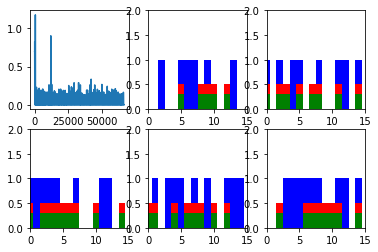

In [8]:
# Using the RNN BasicCell from TensorFlow

# Imports
from __future__ import print_function, division
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Parameters
num_epochs = 100
total_series_length = 50000
truncated_backprop_length = 15
state_size = 4
num_classes = 2
echo_step = 3
batch_size = 5
num_batches = total_series_length//batch_size//truncated_backprop_length

def generateData():
    x = np.array(np.random.choice(2, total_series_length, p=[0.5, 0.5]))
    y = np.roll(x, echo_step)
    y[0:echo_step] = 0

    x = x.reshape((batch_size, -1))  # The first index changing slowest, subseries as rows
    y = y.reshape((batch_size, -1))

    return (x, y)

batchX_placeholder = tf.placeholder(tf.float32, [batch_size, truncated_backprop_length])
batchY_placeholder = tf.placeholder(tf.int32, [batch_size, truncated_backprop_length])

init_state = tf.placeholder(tf.float32, [batch_size, state_size])

W2 = tf.Variable(np.random.rand(state_size, num_classes),dtype=tf.float32)
b2 = tf.Variable(np.zeros((1,num_classes)), dtype=tf.float32)

# Unpack columns
inputs_series = tf.split(batchX_placeholder, truncated_backprop_length, axis=1)
labels_series = tf.unstack(batchY_placeholder, axis=1)

# Forward passes
cell = tf.contrib.rnn.BasicRNNCell(state_size)
states_series, current_state = tf.contrib.rnn.static_rnn(cell, inputs_series, init_state)

# For each state captured in states_series, compute the output
logits_series = [tf.matmul(state, W2) + b2 for state in states_series] #Broadcasted addition

# Predicted output using softmax
predictions_series = [tf.nn.softmax(logits) for logits in logits_series]

# Cross-entropy loss
losses = [tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels) for logits, labels in zip(logits_series,labels_series)]

# Total loss is the average across all losses
total_loss = tf.reduce_mean(losses)

# Run the back-prop to minimize total_loss
train_step = tf.train.AdagradOptimizer(0.3).minimize(total_loss)

def plot(loss_list, predictions_series, batchX, batchY):
    plt.subplot(2, 3, 1)
    plt.cla()
    plt.plot(loss_list)

    for batch_series_idx in range(5):
        one_hot_output_series = np.array(predictions_series)[:, batch_series_idx, :]
        single_output_series = np.array([(1 if out[0] < 0.5 else 0) for out in one_hot_output_series])

        plt.subplot(2, 3, batch_series_idx + 2)
        plt.cla()
        plt.axis([0, truncated_backprop_length, 0, 2])
        left_offset = range(truncated_backprop_length)
        plt.bar(left_offset, batchX[batch_series_idx, :], width=1, color="blue")
        plt.bar(left_offset, batchY[batch_series_idx, :] * 0.5, width=1, color="red")
        plt.bar(left_offset, single_output_series * 0.3, width=1, color="green")

    plt.draw()
    plt.pause(0.0001)

# Run the training
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    plt.ion()
    plt.figure()
    plt.show()
    loss_list = []

    for epoch_idx in range(num_epochs):
        x,y = generateData()
        _current_state = np.zeros((batch_size, state_size))

        print("New data, epoch", epoch_idx)

        for batch_idx in range(num_batches):
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length

            batchX = x[:,start_idx:end_idx]
            batchY = y[:,start_idx:end_idx]
            
            #print('batchX: ', batchX)
            #print('batchY: ', batchY)

            _total_loss, _train_step, _current_state, _predictions_series = sess.run(
                [total_loss, train_step, current_state, predictions_series],
                feed_dict={
                    batchX_placeholder:batchX,
                    batchY_placeholder:batchY,
                    init_state:_current_state
                })

            loss_list.append(_total_loss)

            if batch_idx%100 == 0:
                print("Step",batch_idx, "Loss", _total_loss)
                plot(loss_list, _predictions_series, batchX, batchY)

plt.ioff()
plt.show()